## FD 2 layers package test


In [ ]:
! pip install pmcx
! pip install numpy pmcx jdata bjdata matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 43.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 2.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for bjdata: filename=bjdata-0.4.1-cp311-cp311-linux_x86_64.whl size=22196 sha256=ef7646c84139362326c0d6d44bfe5f1d87dc69839842ac366f0851b0204dbc73
  Stored in directory: /root/.cache/pip/wheels/e4/d5/4a/8d5ccb70c0eb1f07a10da8548e50b7fc0cbdfd014f5eaa45c3
Successfully built bjdata


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pickle
import math
import io

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Path to your folder containing the .py script
folder_path = '/content/drive/MyDrive/MCX_data'
sys.path.append(folder_path)
from FD_msNIRS_2layers import mcx_sim_2layers as ms2

### Read CSV and coef

In [ ]:
# csv file to simulate: change the path!.
csv_path = '/content/drive/MyDrive/MCX_data/sobol_samples.csv'
df = pd.read_csv(csv_path)
# simulations save path
save_path = '/content/drive/MyDrive/MCX_data/result_folder/'

In [ ]:
lambdas = [784, 800, 818, 835, 851, 868, 881, 894]
coef_path = '/content/drive/MyDrive/MCX_data/EC.xlsx'
extinction_coeffs = pd.read_excel(coef_path)

In [ ]:
part_str = csv_path.split('/')[-1].replace('.csv', '').split('_')[-2] + '_' + csv_path.split('_')[-1].replace('.csv', '')
print(part_str)
# make in to be .1
df['d1'] = df['d1'].round(0)

sobol_samples


In [ ]:
df.head()

,HBO1,HHB1,HBO2,HHB2,d1,a1,a2,b1,b2
0,10.618102,12.007143,46.959818,26.97317,12.0,0.889986,0.645209,1.799264,1.401673
1,18.118102,7.007143,31.959818,16.97317,17.0,2.139986,1.895209,1.049264,0.651673
2,6.868102,4.507143,39.459818,31.97317,19.0,1.514986,2.520209,0.674264,1.776673
3,14.368102,9.507143,54.459818,21.97317,14.0,2.764986,1.270209,1.424264,1.026673
4,16.243102,5.757143,35.709818,29.47317,10.0,0.577486,0.957709,1.236764,1.589173


### Generate data using package

In [ ]:
first_row = df.iloc[0]
HBO1=first_row['HBO1']
HHB1=first_row['HHB1']
HBO2=first_row['HBO2']
HHB2=first_row['HHB2']
d1=first_row['d1']
a1=first_row['a1']
a2=first_row['a2']
b1=first_row['b1']
b2=first_row['b2']

In [ ]:
distance_data = ms2(hbo1=HBO1, hhb1 =HHB1, hbo2=HBO2, hhb2=HHB2, l1=d1, coef_path = extinction_coeffs, a1=a1, b1=b1, a2 = a2, b2 = b2, tend=1e-08, devf=1000, nphoton=1.2e8)

nphoton: 1.2e+08
tstart: 0
tstep: 1e-11
tend: 1e-08
maxdetphoton: 1.2e+08
issrcfrom0: 1
autopilot: 1
unitinmm: 1
issaveref: 1
issavedet: 1
nphoton: 1.2e+08
tstart: 0
tstep: 1e-11
tend: 1e-08
maxdetphoton: 1.2e+08
issrcfrom0: 1
autopilot: 1
unitinmm: 1
issaveref: 1
issavedet: 1
nphoton: 1.2e+08
tstart: 0
tstep: 1e-11
tend: 1e-08
maxdetphoton: 1.2e+08
issrcfrom0: 1
autopilot: 1
unitinmm: 1
issaveref: 1
issavedet: 1
nphoton: 1.2e+08
tstart: 0
tstep: 1e-11
tend: 1e-08
maxdetphoton: 1.2e+08
issrcfrom0: 1
autopilot: 1
unitinmm: 1
issaveref: 1
issavedet: 1
nphoton: 1.2e+08
tstart: 0
tstep: 1e-11
tend: 1e-08
maxdetphoton: 1.2e+08
issrcfrom0: 1
autopilot: 1
unitinmm: 1
issaveref: 1
issavedet: 1
nphoton: 1.2e+08
tstart: 0
tstep: 1e-11
tend: 1e-08
maxdetphoton: 1.2e+08
issrcfrom0: 1
autopilot: 1
unitinmm: 1
issaveref: 1
issavedet: 1
nphoton: 1.2e+08
tstart: 0
tstep: 1e-11
tend: 1e-08
maxdetphoton: 1.2e+08
issrcfrom0: 1
autopilot: 1
unitinmm: 1
issaveref: 1
issavedet: 1
nphoton: 1.2e+08
tstart: 0


### Plot

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math

lambdas_default = [784, 800, 818, 835, 851, 868, 881, 894]

def plot_all_distance_wavelengths(distance_data, tend):
    devf = len(next(iter(distance_data.values()))[0])
    t = np.linspace(0, tend, devf)

    num_distances = len(distance_data)
    num_wavelengths = len(lambdas_default)
    total_plots = num_distances * num_wavelengths

    cols = 4
    rows = math.ceil(total_plots / cols)

    fig, axs = plt.subplots(rows, cols, figsize=(4 * cols, 2.5 * rows), sharex=True)
    axs = axs.flatten()

    plot_idx = 0
    for dist, wavelength_signals in distance_data.items():
        for i, signal in enumerate(wavelength_signals):
            ax = axs[plot_idx]
            ax.plot(t, signal)
            ax.set_title(f'{dist} mm - {lambdas_default[i]} nm', fontsize=9)
            ax.set_ylabel('Intensity', fontsize=8)
            ax.tick_params(labelsize=7)
            ax.grid(True)
            plot_idx += 1

    # Remove any unused subplots
    for j in range(plot_idx, len(axs)):
        fig.delaxes(axs[j])

    # Set x-axis label on the last row
    for ax in axs[-cols:]:
        ax.set_xlabel('Time (s)', fontsize=9)

    plt.tight_layout()
    plt.show()

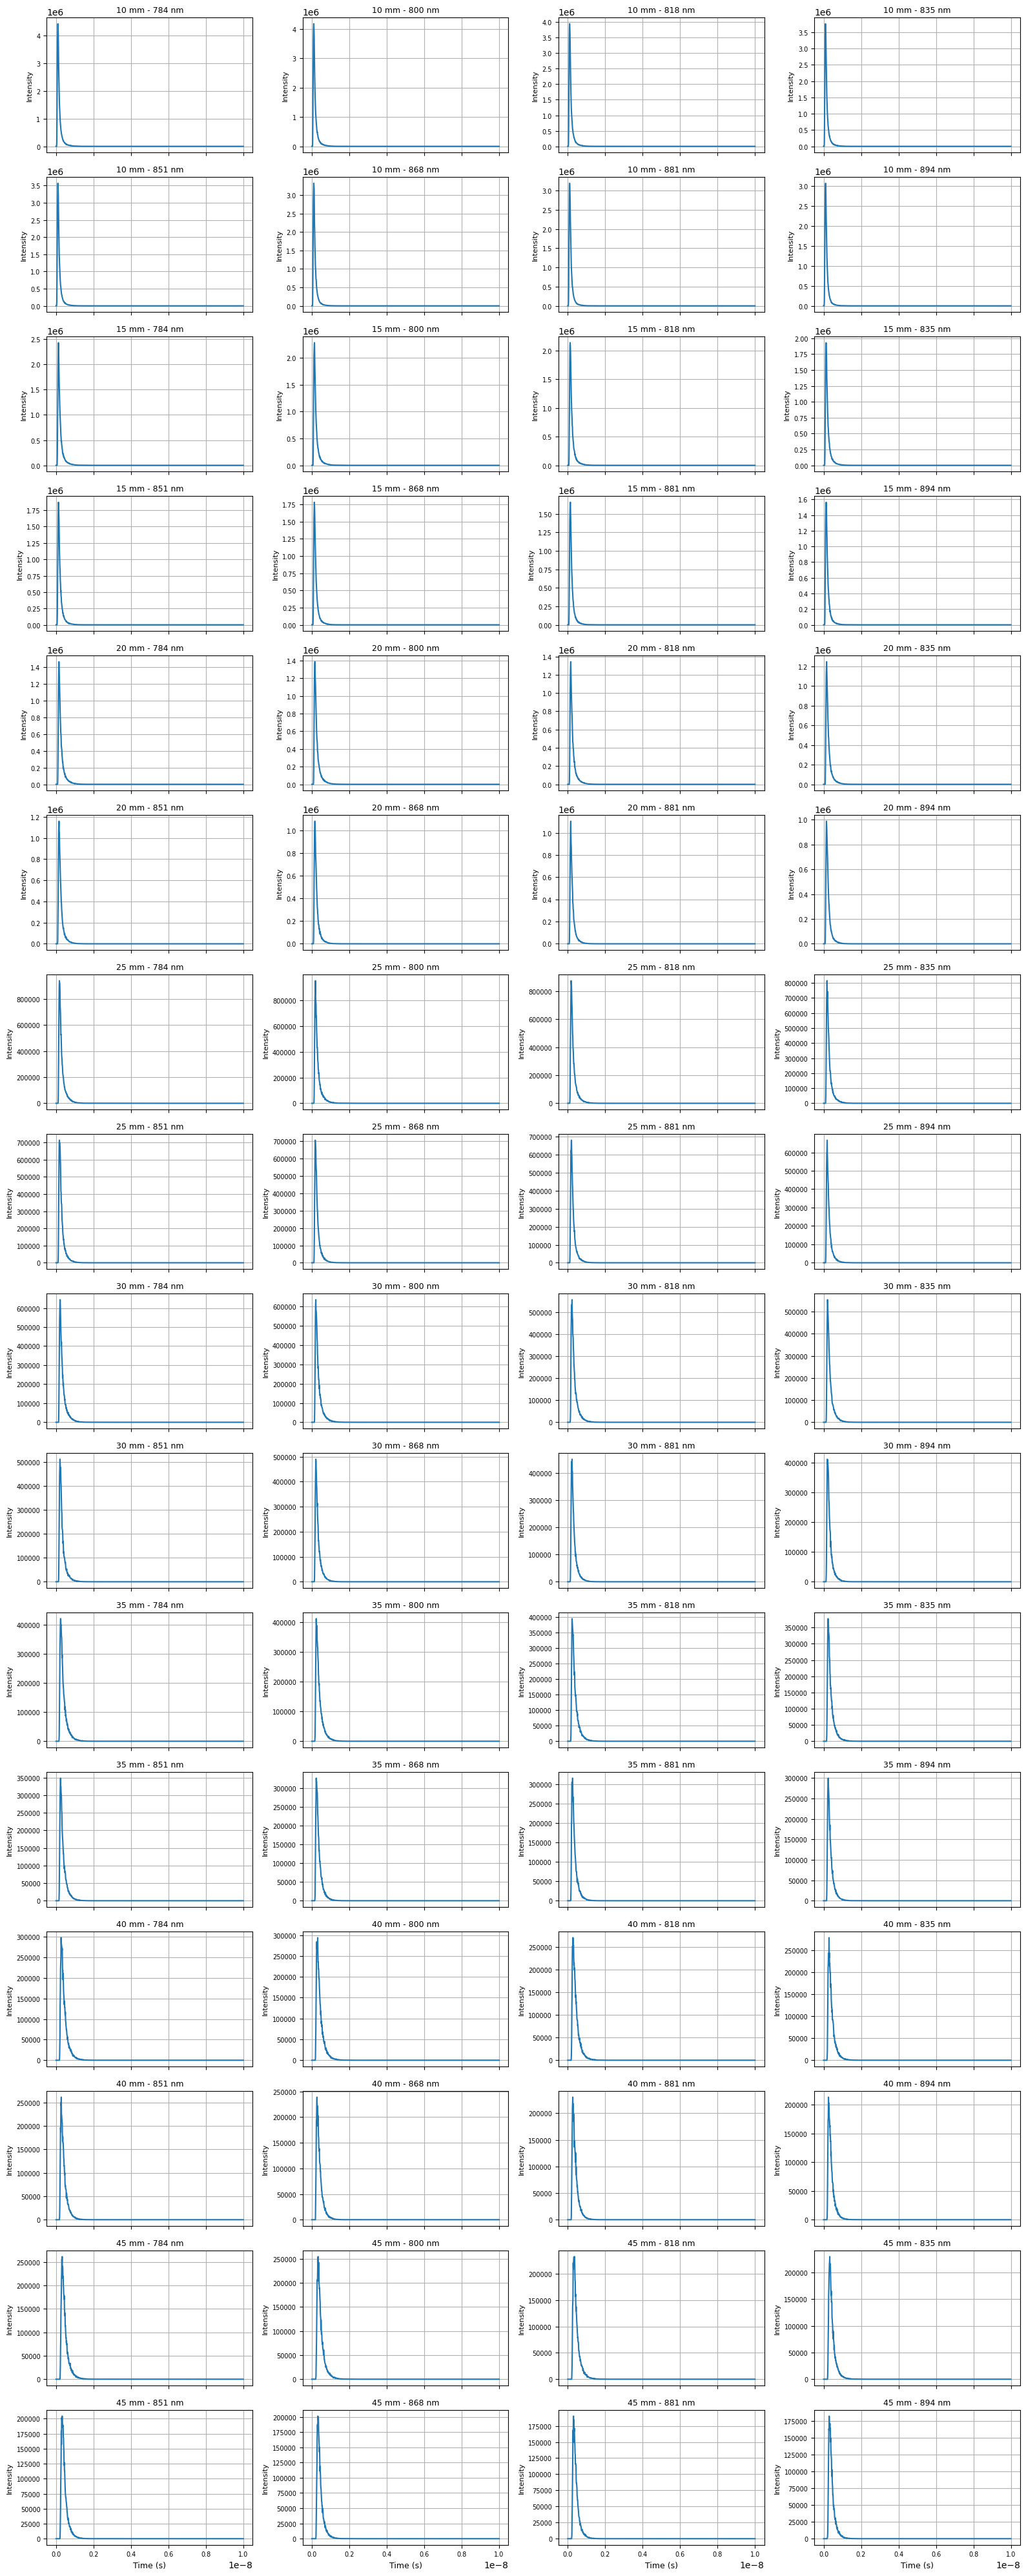

In [ ]:
plot_all_distance_wavelengths(distance_data, tend=1e-8)